In [52]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Convert csv into dataframes. Note that original categorical data has space in front of the value, this is
# eliminated with an extra parameter.
df = pd.read_csv('CustomerChurn.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). [50] Prepare a data quality report for the CSV file.

### - Check how many rows and columns your CSV has.

In [53]:
#Print (rows, columns)
df.shape

(1000, 33)

We have a 1000 customers with 33 features associated with each customer.

### - Print the first and the last 5 rows.

In [54]:
df.head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1059340,56,professional,town,yes,False,7,1,324,True,...,0.00,0.000000,5.108432,0.00,11,0.00,0,0,0,True
1,1010869,0,NaN,suburban,unknown,False,0,2,412,True,...,1.33,2.907508,-4.533335,28.33,30,0.00,1,0,0,False
2,1025527,50,professional,suburban,yes,True,6,2,397,True,...,0.00,3.333636,-1.145834,3.00,22,0.00,0,0,0,True
3,1030183,32,NaN,NaN,yes,False,6,3,290,True,...,11.33,7.098380,-13.514522,10.33,21,0.67,0,0,0,True
4,1029274,0,NaN,suburban,unknown,False,0,1,684,True,...,8.67,1.229328,-2.375600,4.67,23,0.00,0,0,0,True


In [55]:
df.tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
995,1010820,34,NaN,suburban,yes,True,8,1,1017,False,...,6.00,7.938045,8.957264,2.67,34,0.00,0,0,1,True
996,1016712,56,professional,NaN,yes,True,7,2,206,True,...,9.00,1.214292,17.428446,7.33,26,2.00,0,0,0,True
997,1009245,0,NaN,NaN,yes,False,6,1,952,True,...,1.67,1.647059,15.147565,7.33,31,0.33,0,0,0,True
998,1056495,54,NaN,suburban,yes,True,9,1,339,True,...,19.00,0.799381,-5.571665,4.33,11,1.33,0,0,0,True
999,1036358,0,NaN,town,unknown,False,0,2,522,True,...,0.67,0.828192,2.423543,14.33,19,10.67,0,0,0,True


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 

In [56]:
df.dtypes

customer                        int64
age                             int64
occupation                     object
regionType                     object
marriageStatus                 object
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

Based on examining the data in a spreadsheet program, the following decisions were made about the data convertions:

- **bool** values were converted to **categorical**.
- **object** values were converted to **categorical** as they contained finite set of possible values.
- the *'income'* column which is **int64** was converted to **categorical** because it contained finite set of possible values, representing different *income levels*.

In [57]:
# Select columns containing categorical data
categorical_columns = df[['occupation','regionType','marriageStatus','income','creditRating', 'creditCard', 'children', 'smartPhone', 'homeOwner', 'churn']].columns
#income was chosen as category because the data contains single digit values representing income categories

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.dtypes

customer                         int64
age                              int64
occupation                    category
regionType                    category
marriageStatus                category
children                      category
income                        category
numHandsets                      int64
handsetAge                       int64
smartPhone                    category
currentHandsetPrice            float64
creditRating                  category
homeOwner                     category
creditCard                    category
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct

In [58]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
occupation,267,7,professional,179
regionType,531,6,suburban,306
marriageStatus,1000,3,unknown,402
children,1000,2,False,765
income,1000,10,0,268
smartPhone,1000,2,True,891
creditRating,1000,7,B,389
homeOwner,1000,2,False,652
creditCard,1000,6,true,655
churn,1000,2,True,532


### - Drop duplicate rows and columns, if any.

In [61]:
# Checking for duplicated rows
print(df.set_index('customer').index.get_duplicates())

[]


In [62]:
# Checking for duplicated columns
print(df.set_index('customer').index.T.get_duplicates())

[]


In [63]:
# another way to check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


- The *'customer'* column is the only column which is not permitted to have duplicate values. All the other columns can have duplicate values because of the nature of what the columns describe. Here we see that there are no duplicate rows in our dataset.

- The dataset does not contain any duplicate columns.

### - Drop constant columns, if any.

We've already seen above that categorical features don't have constant columns. Let's check continuous features:

In [64]:
# Select columns containing continuous data
continuous_columns = df[['customer','age','numHandsets','handsetAge','currentHandsetPrice', 'avgBill',
                         'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 
                         'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 
                         'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls',
                         'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls',
                         'numRetentionOffersAccepted', 'newFrequentNumbers']].columns

# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
customer,1000.0,1.049027e+06,28337.411453,1.000004e+06,1.025108e+06,1.049217e+06,1.073305e+06,1.099614e+06
age,1000.0,3.063400e+01,22.551599,0.000000e+00,0.000000e+00,3.400000e+01,4.800000e+01,8.600000e+01
numHandsets,1000.0,1.769000e+00,1.365102,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01
handsetAge,1000.0,4.011510e+02,259.406661,-2.000000e+00,2.180000e+02,3.445000e+02,5.420000e+02,1.812000e+03
currentHandsetPrice,1000.0,3.482581e+01,56.561167,0.000000e+00,0.000000e+00,0.000000e+00,3.249000e+01,3.999900e+02
avgBill,1000.0,5.734780e+01,44.519769,0.000000e+00,3.324750e+01,4.915500e+01,6.917500e+01,4.696700e+02
avgMins,1000.0,5.013036e+02,530.272984,0.000000e+00,1.475000e+02,3.470000e+02,6.638750e+02,4.598750e+03
avgrecurringCharge,1000.0,4.632820e+01,24.246087,0.000000e+00,3.000000e+01,4.499000e+01,5.999000e+01,2.999900e+02
avgOverBundleMins,1000.0,3.888876e+01,94.715038,0.000000e+00,0.000000e+00,4.000000e+00,4.225000e+01,1.389000e+03
avgRoamCalls,1000.0,9.162200e-01,4.940806,0.000000e+00,0.000000e+00,0.000000e+00,2.750000e-01,1.310400e+02


A non zero **std** or **standard deviation** implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.

### - Save your updated/cleaned data frame to a new csv file.

In [65]:
# Write the dataframe to a csv file
df.to_csv('CustomerChurn_1-1.csv', index=False)

### - Prepare a table with descriptive statistics for all the continuous features.

In [66]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
customer,1000.0,1.049027e+06,28337.411453,1.000004e+06,1.025108e+06,1.049217e+06,1.073305e+06,1.099614e+06
age,1000.0,3.063400e+01,22.551599,0.000000e+00,0.000000e+00,3.400000e+01,4.800000e+01,8.600000e+01
numHandsets,1000.0,1.769000e+00,1.365102,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01
handsetAge,1000.0,4.011510e+02,259.406661,-2.000000e+00,2.180000e+02,3.445000e+02,5.420000e+02,1.812000e+03
currentHandsetPrice,1000.0,3.482581e+01,56.561167,0.000000e+00,0.000000e+00,0.000000e+00,3.249000e+01,3.999900e+02
avgBill,1000.0,5.734780e+01,44.519769,0.000000e+00,3.324750e+01,4.915500e+01,6.917500e+01,4.696700e+02
avgMins,1000.0,5.013036e+02,530.272984,0.000000e+00,1.475000e+02,3.470000e+02,6.638750e+02,4.598750e+03
avgrecurringCharge,1000.0,4.632820e+01,24.246087,0.000000e+00,3.000000e+01,4.499000e+01,5.999000e+01,2.999900e+02
avgOverBundleMins,1000.0,3.888876e+01,94.715038,0.000000e+00,0.000000e+00,4.000000e+00,4.225000e+01,1.389000e+03
avgRoamCalls,1000.0,9.162200e-01,4.940806,0.000000e+00,0.000000e+00,0.000000e+00,2.750000e-01,1.310400e+02


### - Prepare a table with descriptive statistics for all the categorical features.

In [67]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
occupation,267,7,professional,179
regionType,531,6,suburban,306
marriageStatus,1000,3,unknown,402
children,1000,2,False,765
income,1000,10,0,268
smartPhone,1000,2,True,891
creditRating,1000,7,B,389
homeOwner,1000,2,False,652
creditCard,1000,6,true,655
churn,1000,2,True,532


### - Plot histograms for all the continuous features.

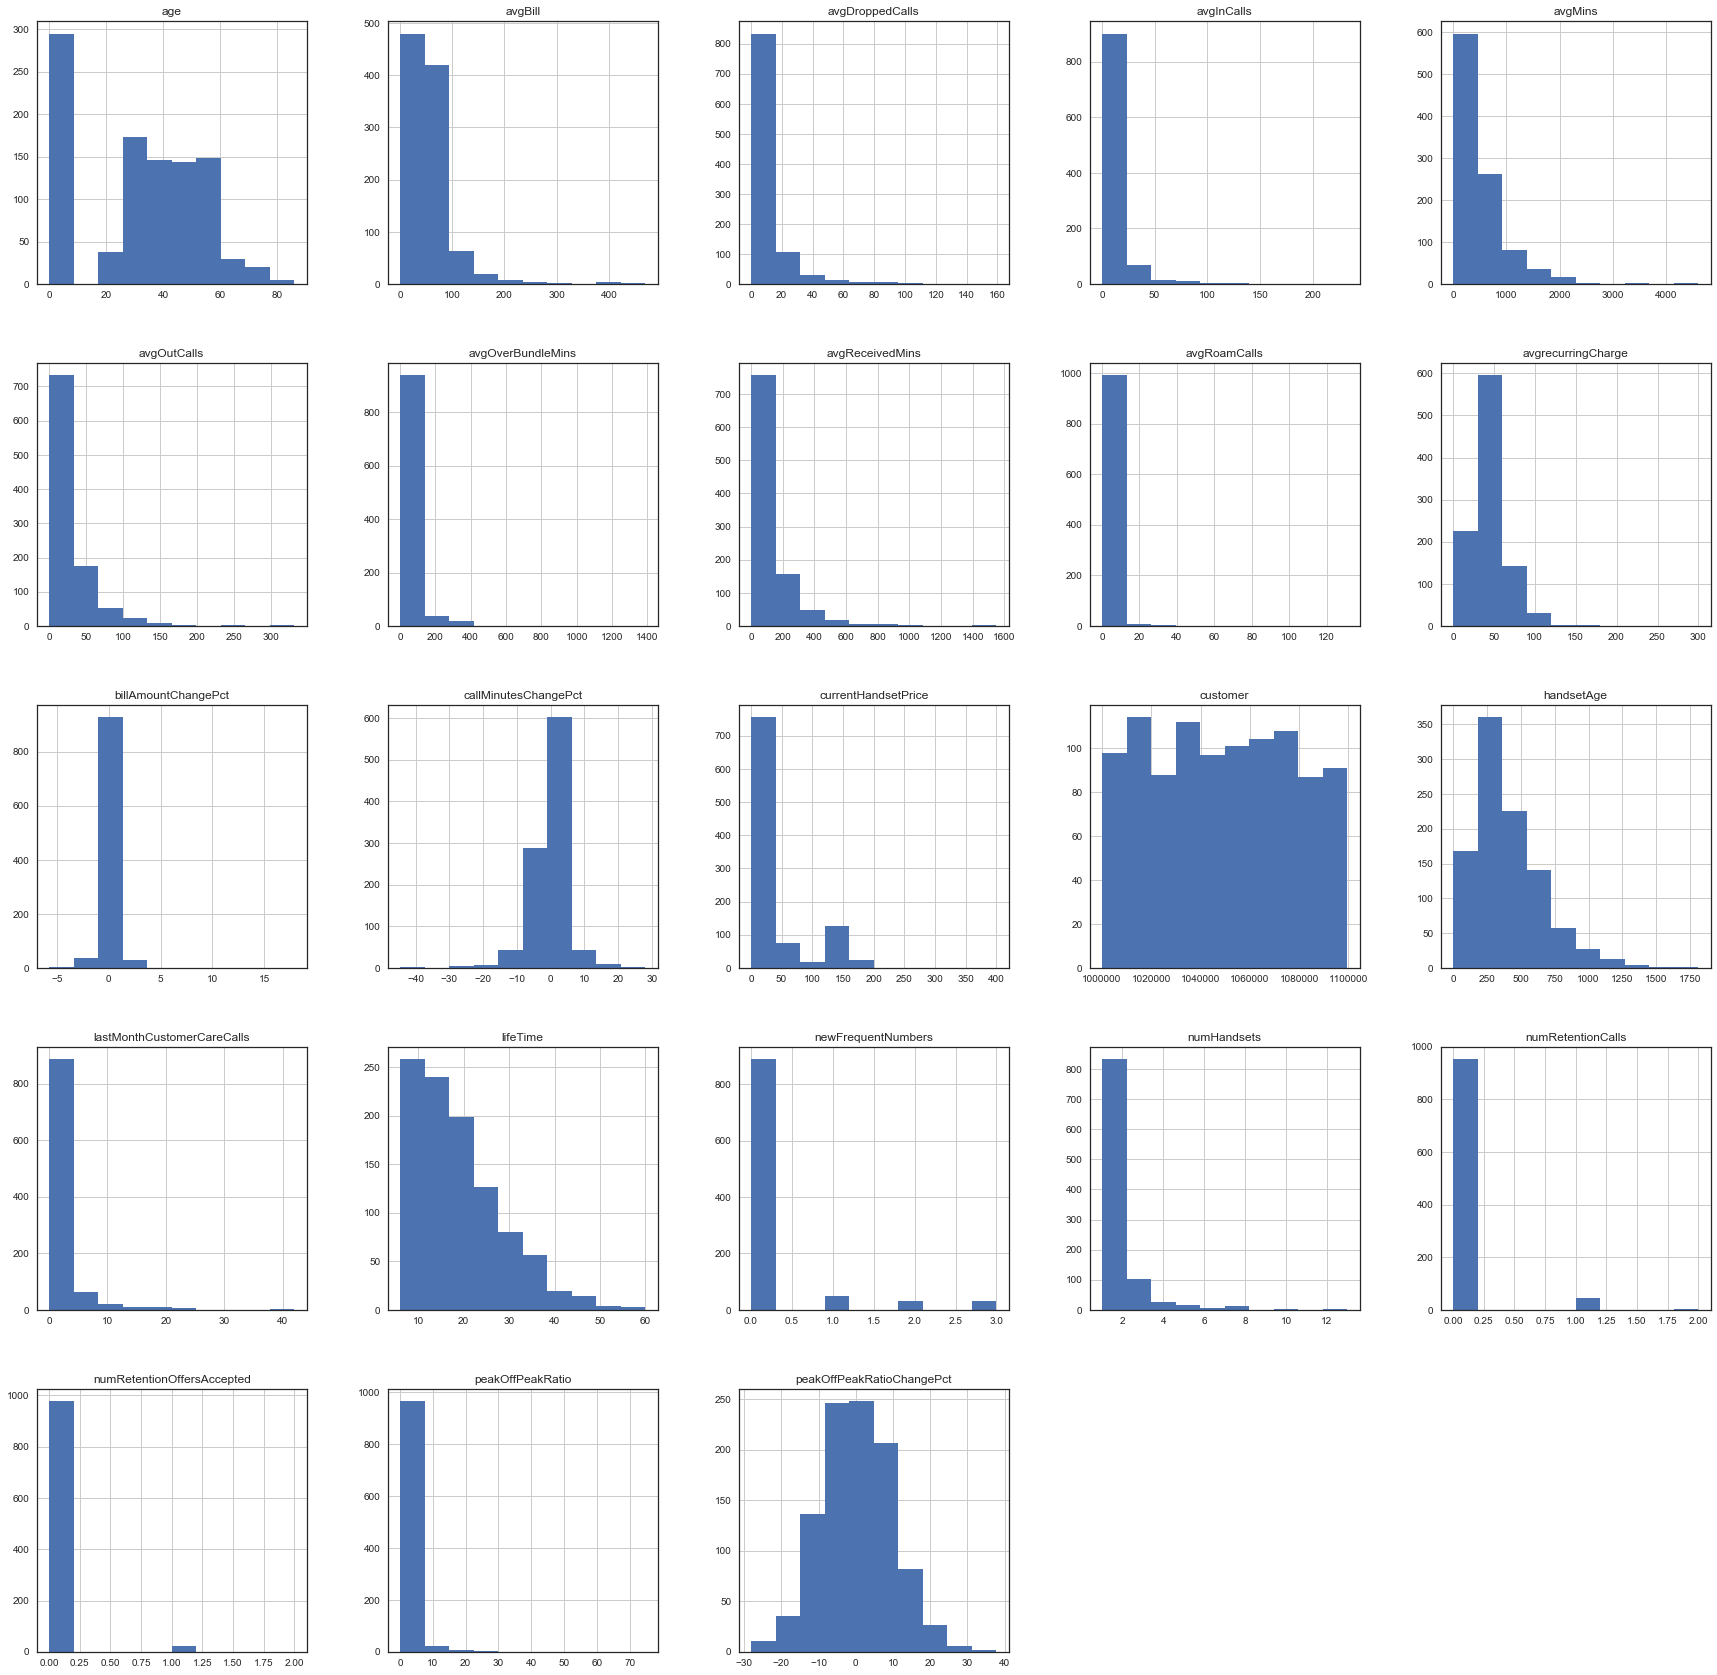

In [68]:
# Plot a histogram of the continuous features (and save in a png file)
df[continuous_columns].hist(figsize=(30,30))
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot box plots for all the continuous features.

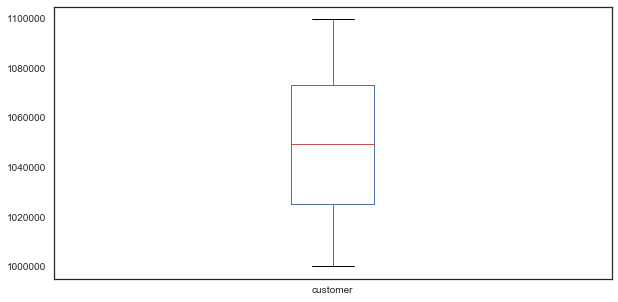

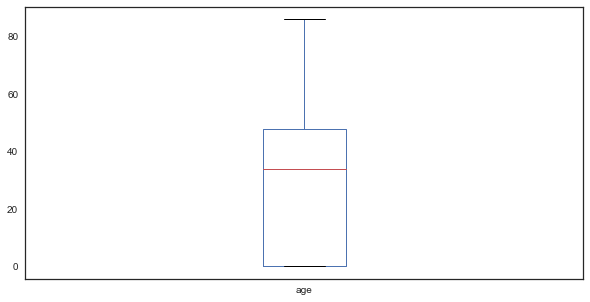

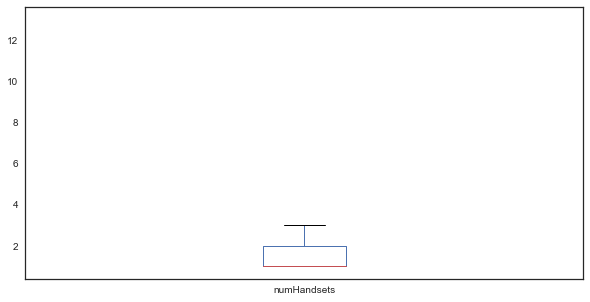

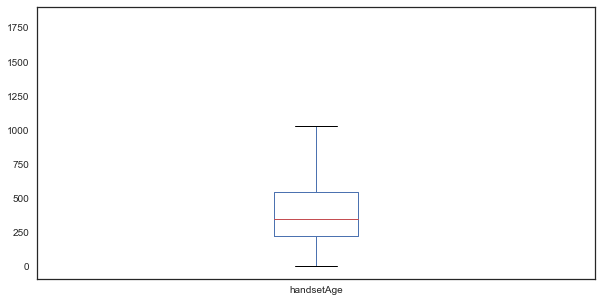

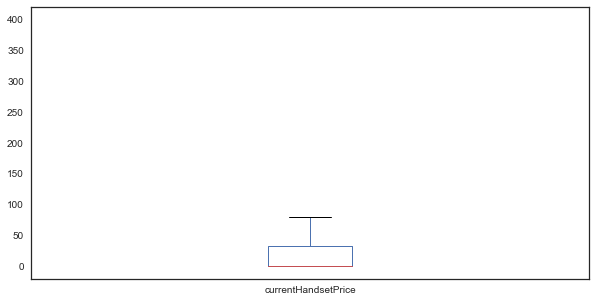

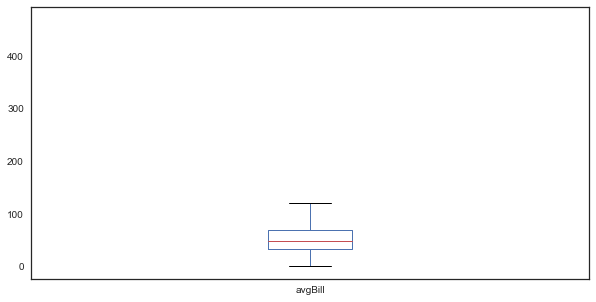

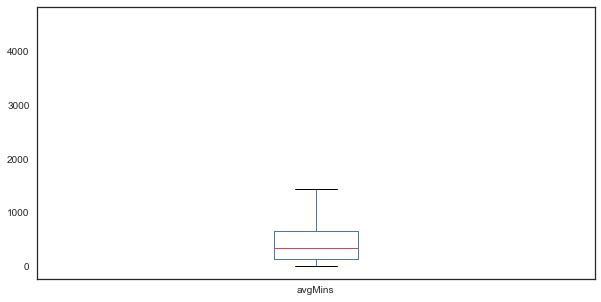

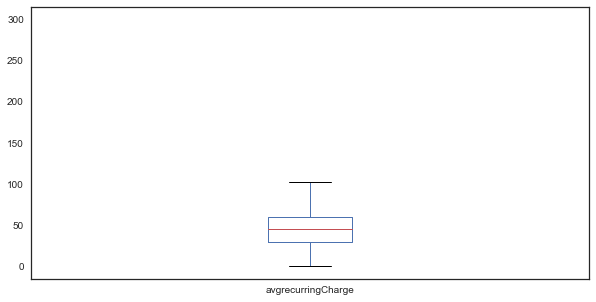

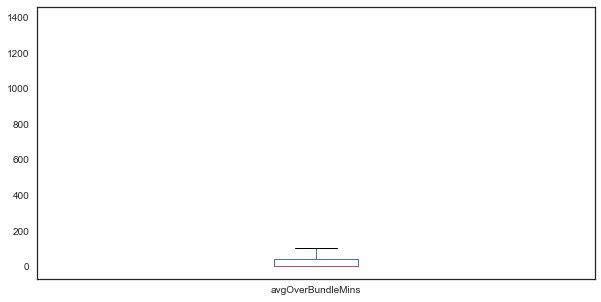

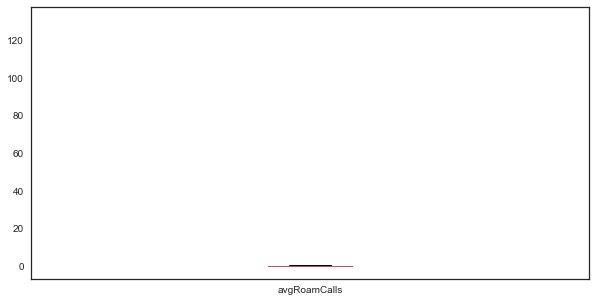

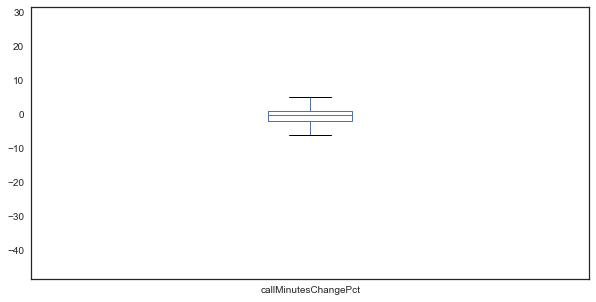

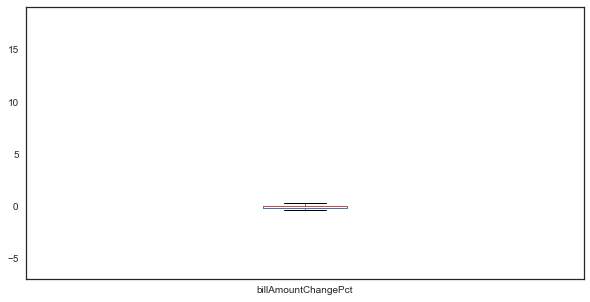

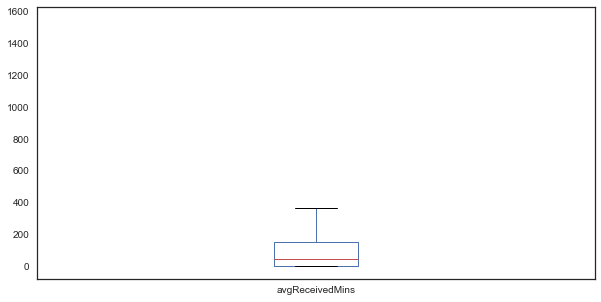

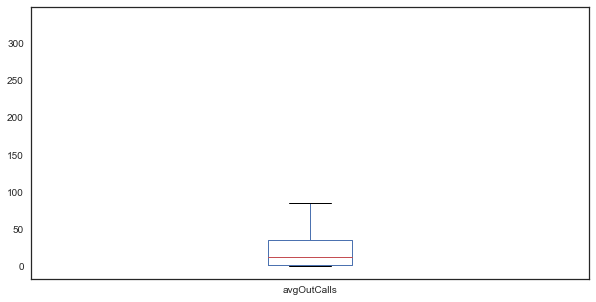

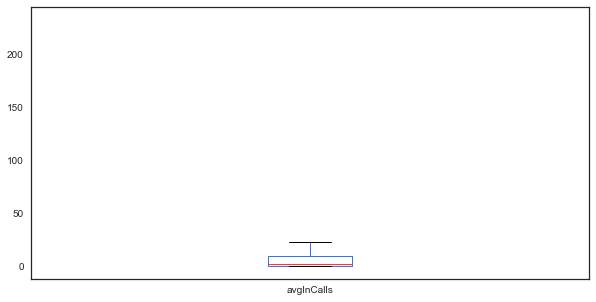

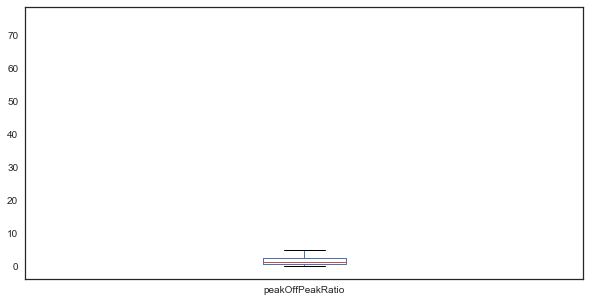

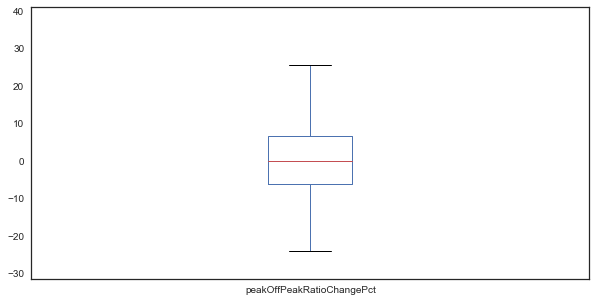

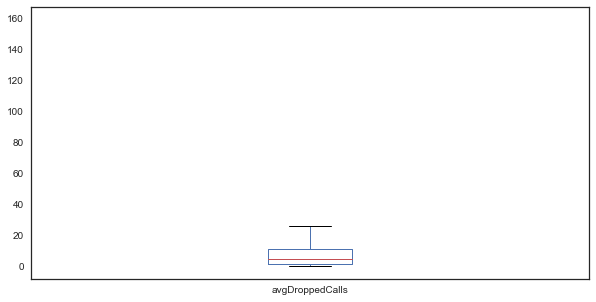

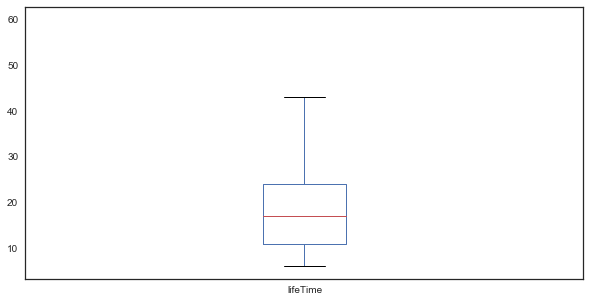

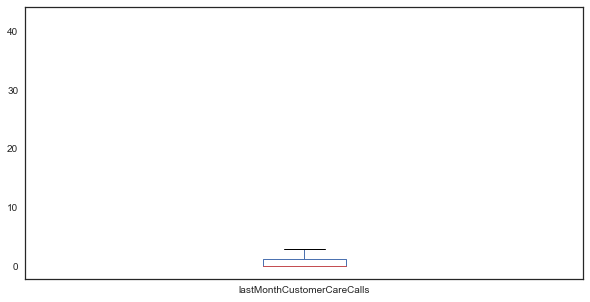

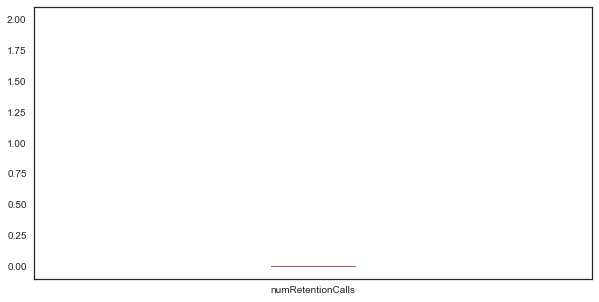

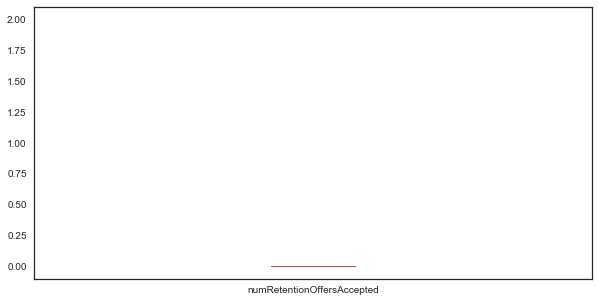

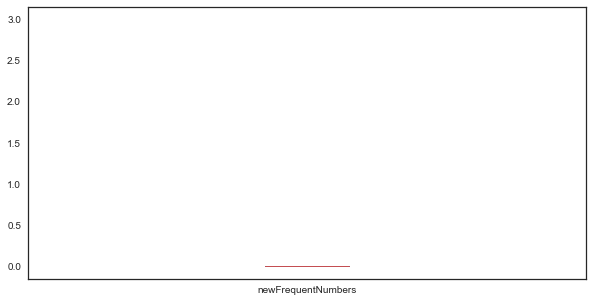

In [69]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_boxplots_1-1.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()
    

### - Plot bar plots for all the categorical features.

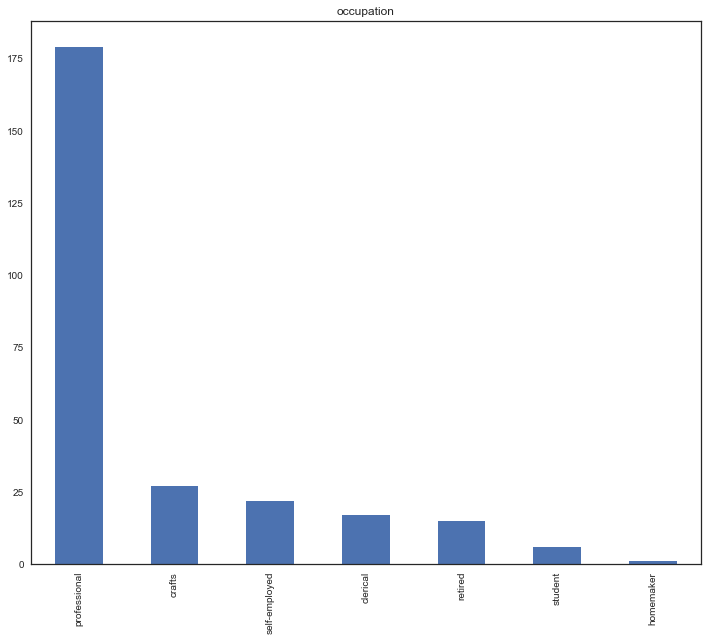

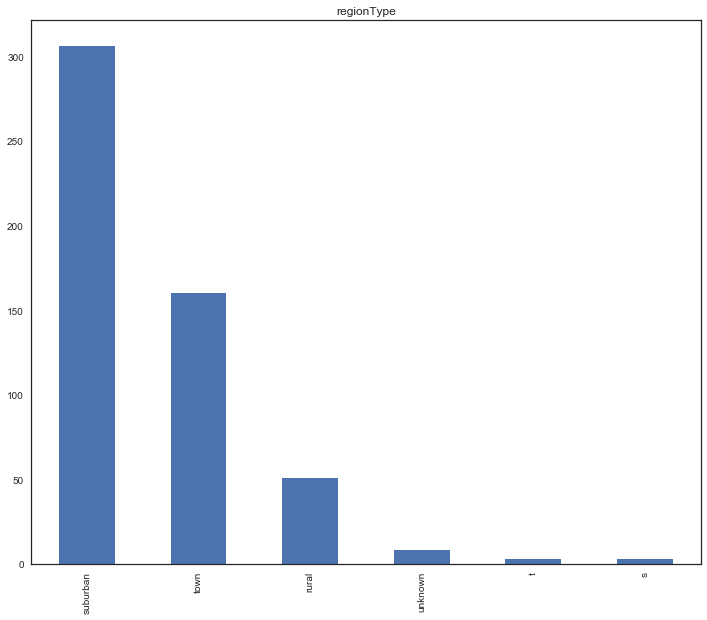

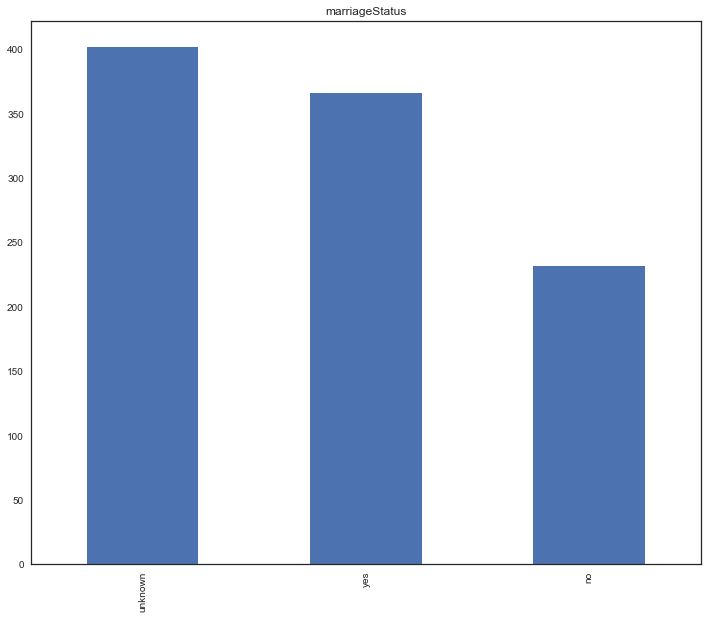

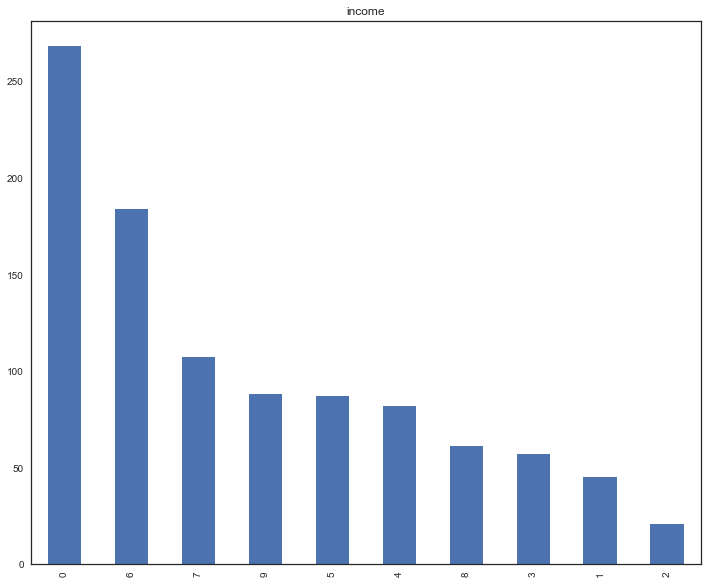

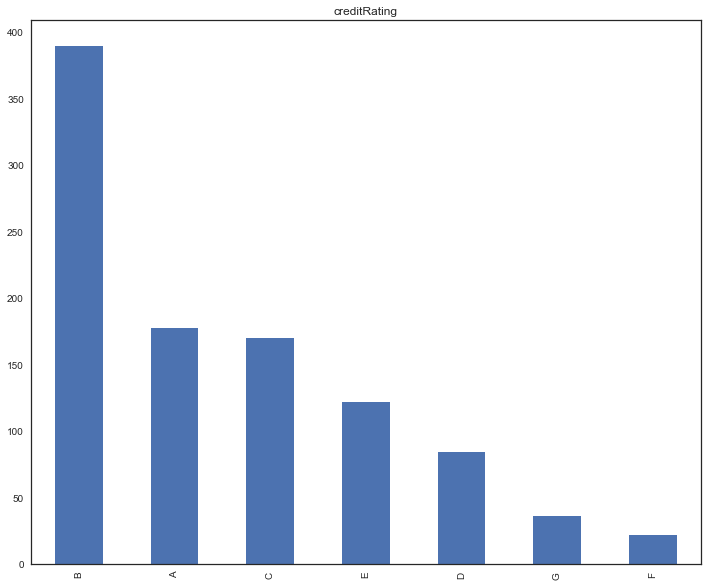

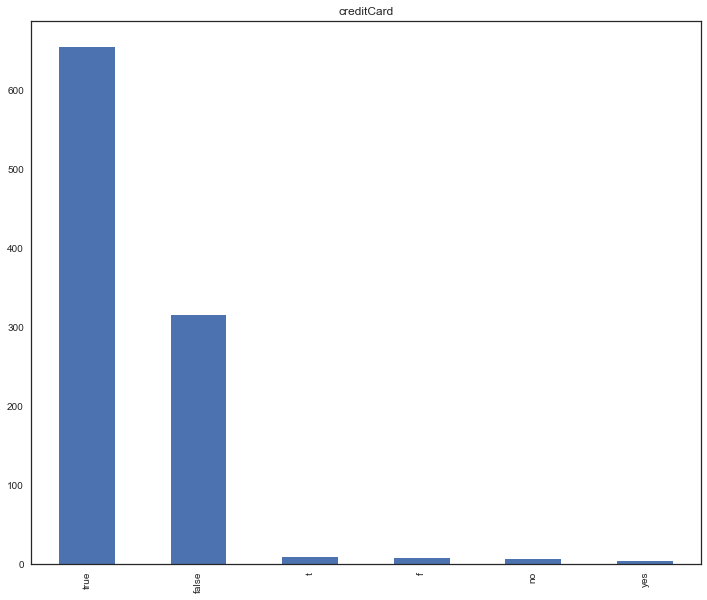

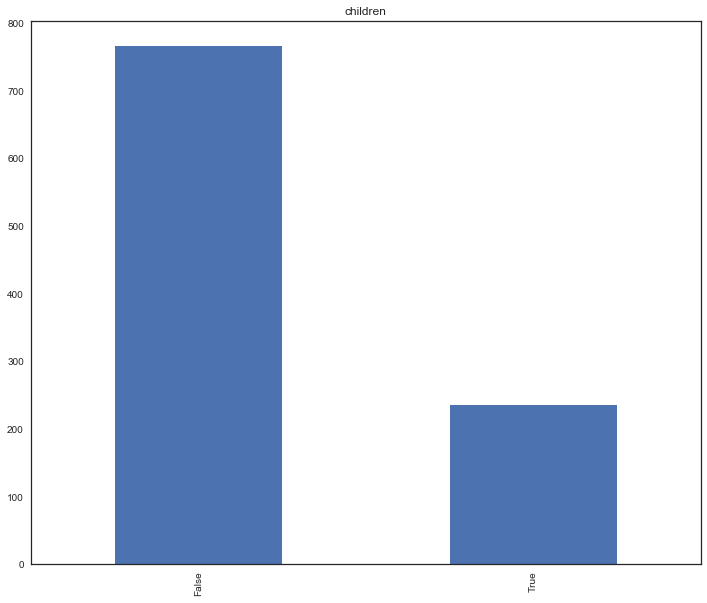

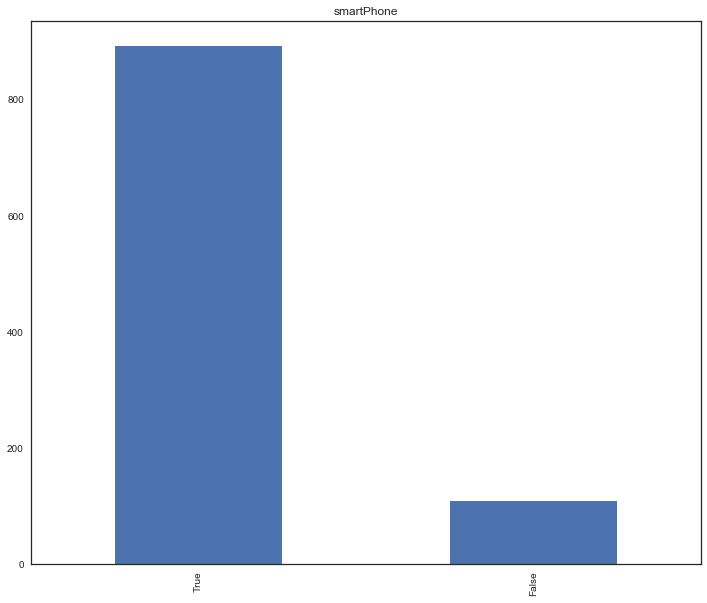

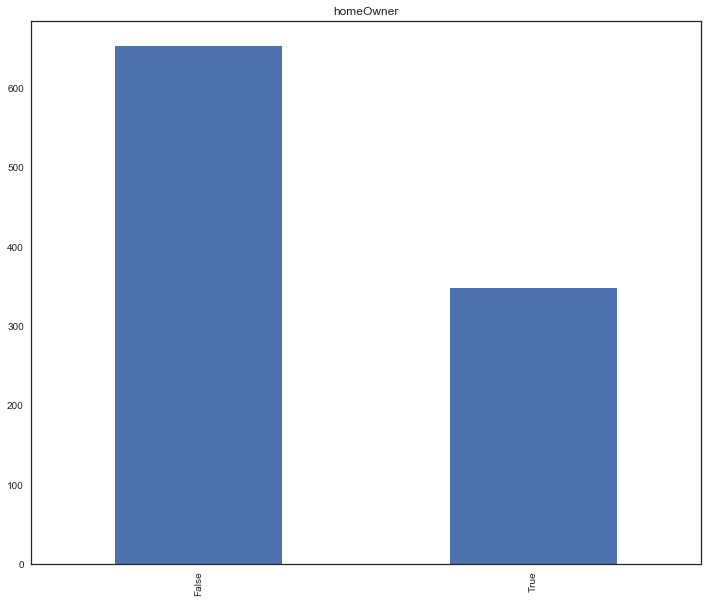

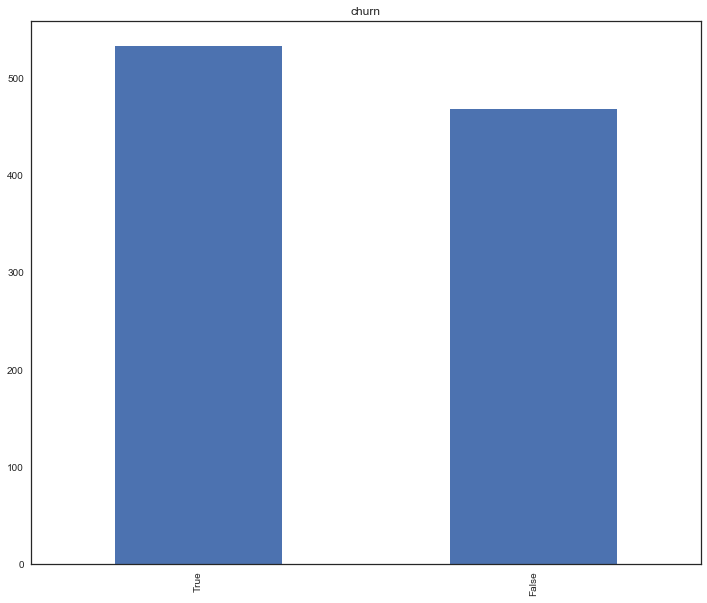

In [70]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_barcharts_1-1.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### - Discuss your initial findings.

### - Save the initial discussion of your findings into a single data quality report PDF file.  

The discussion can be found in a pdf file called **Data_Quality_Report_Initial_Findings.pdf**

# (2). [30] Prepare a data quality plan for the cleaned CSV file.

### - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- age feature has many zeros.
- handset age has a negative minimum value.
- current handset price is zero for 50% of values.
- occupation value count is 267 out of 1000.
- region type value count is 531 out of 1000.
- marriage status is "unknown" for 402 out of 1000.
- customer is a redundant column giving us the the numerical ID of the customer. This gives us no useful information.
- the outliers in the box plots initially appear to make sense but should be further investigated here.
- region type has irregular cardinality.
- credit card has irregular cardinality.

### In adition to the problems above, I'll perform some standard checks to find any aditional issues:

### Check for Irregular cardinalities

In [71]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- occupation:", pd.unique(df.occupation.ravel()))
print("\n- regionType:", pd.unique(df.regionType.ravel()))
print("\n- marriageStatus:", pd.unique(df.marriageStatus.ravel()))
print("\n- children:", pd.unique(df.children.ravel()))
print("\n- income:", pd.unique(df.income.ravel()))
print("\n- smartPhone:", pd.unique(df.smartPhone.ravel()))
print("\n- creditRating:", pd.unique(df.creditRating.ravel()))
print("\n- homeOwner:", pd.unique(df.homeOwner.ravel()))
print("\n- creditCard:", pd.unique(df.creditCard.ravel()))
print("\n- churn:", pd.unique(df.churn.ravel()))

Unique values for:
- occupation: ['professional' nan 'self-employed' 'crafts' 'student' 'retired' 'clerical'
 'homemaker']

- regionType: ['town' 'suburban' nan 'rural' 's' 'unknown' 't']

- marriageStatus: ['yes' 'unknown' 'no']

- children: [False True]

- income: [7 0 6 5 4 8 3 9 1 2]

- smartPhone: [True False]

- creditRating: ['B' 'F' 'C' 'D' 'E' 'A' 'G']

- homeOwner: [False True]

- creditCard: ['true' 'false' 't' 'no' 'f' 'yes']

- churn: [True False]


- regionType has irregular cardinality
- creditCard has irregular cardinality

### Null values

In [72]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

customer                        0
age                             0
occupation                    733
regionType                    469
marriageStatus                  0
children                        0
income                          0
numHandsets                     0
handsetAge                      0
smartPhone                      0
currentHandsetPrice             0
creditRating                    0
homeOwner                       0
creditCard                      0
avgBill                         0
avgMins                         0
avgrecurringCharge              0
avgOverBundleMins               0
avgRoamCalls                    0
callMinutesChangePct            0
billAmountChangePct             0
avgReceivedMins                 0
avgOutCalls                     0
avgInCalls                      0
peakOffPeakRatio                0
peakOffPeakRatioChangePct       0
avgDroppedCalls                 0
lifeTime                        0
lastMonthCustomerCareCalls      0
numRetentionCa

- occupation has null values
- regionType has null values

Overall, no additional problems have surfaced.

### - Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other.

As data collection is an expensive and/or time consuming process, it is the first priority to always try to keep as much original data intact as possible before making any cuts/removals or modifications. Thus my decisions below are based on this principle of data preservation:

1. **age feature has many zeros.** 
About 30% of values are zero, thus investigation should be made to try and deduce what the zero value means and if possible, perform imputation. Otherwise, the feature may have to be dropped.
- **handset age has a negative minimum value.**
May be invalid data. Investigate how many rows are involved. If number is low, remove those rows, if number is high, remove the feature.
- **current handset price is zero for 50% of values.**
May be invalid data.Investigate how many rows are involved. If number is low, remove those rows, if number is high, remove the feature.
- **occupation value count is 267 out of 1000.**
As more than 50% of values are missing, this feature will have to be dropped.
- **region type value count is 531 out of 1000.**
As close to 50% of values are missing, this feature will have to be dropped.
- **marriage status is "unknown" for 402 out of 1000.**
Uknown is synonimous with missing data. Too much is missing for imputation. Investigation should be made if the feature should be dropped.
- **customer is a redundant column giving us the the numerical ID of the customer. This gives us no useful information.**
As there is no useful information, this feature should be dropped.
- **the outliers in the box plots initially appear to make sense but should be further investigated here.**
Investigate if the outliers can be justified. If they make sense, keep them. If they don't make sense, remove the outlier rows.
- **region type has irregular cardinality.**
Merge the cardinalities into the same category.
- **credit card has irregular cardinality.**
Merge the cardinalities into the same category.

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **age feature has many zeros.** 
About 30% of values are zero, thus investigation should be made to try and deduce what the zero value means and if possible, perform imputation. Otherwise, the feature may have to be dropped.

In [73]:
temp_df = df[df['age'] == 0]
temp_df = temp_df[temp_df['children'] == True]
temp_df[['age', 'children']]

,age,children


In [74]:
temp_df = df[df['age'] == 0]
temp_df.age.count()

295

In [75]:
temp_df = temp_df[temp_df['homeOwner'] == True]
temp_df.head(5)[['age', 'homeOwner']]

,age,homeOwner
1,0,True
4,0,True
6,0,True
12,0,True
19,0,True


In [76]:
temp_df.homeOwner.count()

265

In [77]:
temp_df = df[df['age'] == 0]
temp_df = temp_df[temp_df.occupation.notnull()]
temp_df.head(5)[['age', 'occupation']]

,age,occupation
725,0,retired
737,0,professional


Three possibilities exist. Either the age 0 group are under 18 and AT is not allowed to record their age, or the age 0 group are over 18 but the data is simply missing or both. Based on the investigations above, I conclude that the age 0 group is over the age of 18 and that the data is simply missing with value of 0 as default. Justification is that age 0 group includes professional and retired customers. Customer under 18 is unlikely to already be retired. Also the majority, 265/295 of age 0 customers are home owners. Customer under 18 is unlikely to be a home owner.

**Thus I as the values represent customers over 18, I have decided to perform imputation by setting the customers with age of 0 to the median age of the sample.**

In [78]:
print("The middle age is that will be used is: ", df['age'].median())
df['age'] = df['age'].replace(0, df['age'].median())

The middle age is that will be used is:  34.0


2.**handset age has a negative minimum value.**
May be invalid data. Investigate how many rows are involved. If number is low, remove those rows, if number is high, remove the feature.

In [79]:
df[df['handsetAge'] < 0]

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
627,1046969,32,retired,NaN,yes,False,1,2,-2,True,...,0.0,0.0,9.379005,0.0,20,0.0,1,0,0,True


There's only a single row that has an invalid value for handset age. Assumption will be made here that the value was accidentally entered as negative.

**Thus I will preserve the row and change the value to positive value.**

In [80]:
df['handsetAge'] = df['handsetAge'].replace(-2, 2)

3.**current handset price is zero for 50% of values.**
May be invalid data.Investigate how many rows are involved. If number is low, remove those rows, if number is high, remove the feature.

In [81]:
df[df['currentHandsetPrice'] == 0]['currentHandsetPrice'].count()

581

In [82]:
df[df['currentHandsetPrice'] == 0][df['avgMins'] == 0][['currentHandsetPrice', 'avgBill', 'avgMins']]

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,currentHandsetPrice,avgBill,avgMins
23,0.0,8.23,0.0
47,0.0,5.00,0.0
182,0.0,17.15,0.0
196,0.0,53.99,0.0
251,0.0,5.05,0.0
319,0.0,16.99,0.0
424,0.0,18.62,0.0
459,0.0,23.07,0.0
821,0.0,14.99,0.0


The rationale is that if the phone price is zero, either the phone comes free with the data plan from AT, or the data is missing and zero is the defualt value. I tried to associate the free phones with the bill price and call minutes. If the call minutes are zero, then the bill should be zero. However if the bill ammount is not zero, but rather something like for e.g. 39.99, this implies a constant monthly bill that is typical for a data plan, where the user gets the phone "free", but has monthly bill to pay for the data plan. 

While some values resemble what I was looking for, such as 16.99, 14.99, 53.99 etc. there is no consistency among the values. They are all different. This means the average bill probably also includes other costs for other services such as SMS for e.g., but the information we have is for calls only, making it impossible to subtract the price of other services from the average bill. Additionally, some bills are as low as 5.00, which seem unusually low for any free phone plan.

The conclusion, is that the data is most likelly missing and default value of zero is applied. Unfortunately since more than 50% of data is missing, imputation is not possible.

**As more than half of the data is missing, I have decided to drop this feature.**

In [83]:
df = df.drop('currentHandsetPrice', 1)

4.**occupation value count is 267 out of 1000.**
As more than 50% of values are missing, this feature will have to be dropped.

In [84]:
df = df.drop('occupation', 1)

5.**region type value count is 531 out of 1000.**
As close to 50% of values are missing, this feature will have to be dropped.

In [85]:
df = df.drop('regionType', 1)

6.**marriage status is "unknown" for 402 out of 1000.**
Uknown is synonimous with missing data. Too much is missing for imputation. Investigation should be made if the feature should be dropped.

In [86]:
married = int(df[df['marriageStatus'] == 'yes'][['marriageStatus']].count())
homeOwn = int(df[df['marriageStatus'] == 'yes'][df['homeOwner'] == True][['homeOwner']].count())
print("Percentage of Married and home owners: ", homeOwn/married)

Percentage of Married and home owners:  0.04371584699453552


/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [87]:
married = int(df[df['marriageStatus'] == 'no'][['marriageStatus']].count())
homeOwn = int(df[df['marriageStatus'] == 'no'][df['homeOwner'] == True][['homeOwner']].count())
print("Percentage of Married and home owners: ", homeOwn/married)

Percentage of Married and home owners:  0.1939655172413793


/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [88]:
married = int(df[df['marriageStatus'] == 'unknown'][['marriageStatus']].count())
homeOwn = int(df[df['marriageStatus'] == 'unknown'][df['homeOwner'] == True][['homeOwner']].count())
print("Percentage of Married and home owners: ", homeOwn/married)

Percentage of Married and home owners:  0.7139303482587065


/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


I attempted to see if the unknown category matched either married or unmarried in terms of percentage of home ownership. Unfortunately I could not find any such relationship and have decided to drop the feature.

In [89]:
df = df.drop('marriageStatus', 1)

7. **customer is a redundant column giving us the the numerical ID of the customer. This gives us no useful information.**
As there is no useful information, this feature should be dropped for data analysis. It could be useful to keep in one version of data to be able to relate back to specific customers.

In [90]:
df = df.drop('customer', 1)

8.**the outliers in the box plots initially appear to make sense but should be further investigated here.**
Investigate if the outliers can be justified. If they make sense, keep them. If they don't make sense, remove the outlier rows.

The columns with outliers are:
- numHandsets
- handsetAge
- avgBill
- avgMins
- avgrecurringCharge
- avgOverBundleMins
- avgRoamCalls
- callMinutesChangePct
- billAmountChangePct
- avgReceivedMins
- avgOutCalls
- avgInCalls
- peakOffPeakRatio
- avgDroppedCalls
- peakOffPeakRatioChangePct
- lifeTime
- lastMonthCustomerCareCalls
- numRetentionCalls
- numRetentionOffersAccepted
- newFrequentNumbers

In [91]:
df.sort_values(by='avgBill', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgReceivedMins', 'avgOutCalls']].head(5)

,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgReceivedMins,avgOutCalls
259,469.67,4530.75,84.99,1389.0,1402.20,91.33
579,450.09,4598.75,117.52,1194.5,771.10,320.33
818,409.00,3368.25,109.99,843.5,1076.57,153.67
809,393.09,1812.25,84.99,29.0,194.70,141.33
765,376.39,1544.00,52.67,364.0,351.15,78.00


There is consistency here, as bill increases do does the average minutes, average recurring charge, average over bundle minutes, average received minutes and average out calls. 

In [92]:
df.sort_values(by='avgRoamCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgInCalls', 'peakOffPeakRatio', 'avgDroppedCalls']].head(5)

,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgInCalls,peakOffPeakRatio,avgDroppedCalls
334,131.04,-4.470,-2.5928,26.67,1.805195,18.33
230,35.12,-15.630,-1.7160,7.33,2.850741,47.00
600,31.87,-17.160,-0.5518,2.00,1.264447,159.33
35,30.90,1.775,-1.0066,2.33,4.227753,10.33
425,22.24,-0.915,-0.1730,0.67,1.092593,24.33


In [93]:
df.sort_values(by='billAmountChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgInCalls', 'peakOffPeakRatio', 'avgDroppedCalls', 'peakOffPeakRatioChangePct', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers', 'handsetAge', 'numHandsets']].head(5)

,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgInCalls,peakOffPeakRatio,avgDroppedCalls,peakOffPeakRatioChangePct,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,handsetAge,numHandsets
765,0.00,8.940,17.9114,78.33,0.610818,81.33,-13.066105,11,7.67,0,0,0,234,2
901,0.00,1.500,8.1386,15.00,0.577255,14.33,2.193846,21,11.33,0,0,0,145,2
31,4.32,28.050,5.4590,1.33,2.011926,6.00,-4.458985,15,2.00,0,0,0,242,2
983,0.00,14.385,3.1650,3.67,1.766667,10.67,1.057309,11,0.33,0,0,0,305,1
458,3.31,9.435,3.0376,93.00,0.687994,41.00,-5.158097,9,7.67,0,0,0,273,1


In [94]:
df.sort_values(by='peakOffPeakRatio', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgInCalls', 'peakOffPeakRatio', 'avgDroppedCalls', 'peakOffPeakRatioChangePct', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers', 'handsetAge', 'numHandsets']].head(5)

,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgInCalls,peakOffPeakRatio,avgDroppedCalls,peakOffPeakRatioChangePct,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,handsetAge,numHandsets
164,0.00,3.010,0.8850,22.00,74.774775,4.67,3.586299,31,0.67,0,0,0,606,2
822,0.00,-0.145,0.0000,0.00,27.272727,0.33,10.866620,32,0.00,0,0,0,946,1
948,0.00,-0.650,-0.0924,0.00,26.272727,0.33,-9.446906,11,0.00,0,0,0,312,1
446,4.81,-3.800,-0.1704,0.33,20.914648,7.00,-2.269557,17,0.00,0,0,1,333,2
620,0.00,-0.035,-0.0050,0.00,20.895522,0.00,0.897119,32,0.00,1,1,0,955,1


There are too many outliers to consider here. I could not deduce wether the outlier are wrong or not. Thus to be on the safe side I decided to keep them. The machine learning algorithms still need to deal with outliers in the real world as training data that is *too perfect and ideal* is just another form of bias.

9.**region type has irregular cardinality.**
Merge the cardinalities into the same category.

### Region type has already been dropped as a feature...

10.**credit card has irregular cardinality.**
Merge the cardinalities into the same category.

In [95]:
df['creditCard'] = df['creditCard'].replace('t', 'true')
df['creditCard'] = df['creditCard'].replace('yes', 'true')
df['creditCard'] = df['creditCard'].replace('f', 'false')
df['creditCard'] = df['creditCard'].replace('no', 'false')

In [96]:
print("\n- creditCard:", pd.unique(df.creditCard.ravel()))


- creditCard: ['true' 'false']


In [97]:
df.dtypes

age                              int64
children                      category
income                        category
numHandsets                      int64
handsetAge                       int64
smartPhone                    category
creditRating                  category
homeOwner                     category
creditCard                    category
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct      float64
avgDroppedCalls                float64
lifeTime                         int64
lastMonthCustomerCareCalls     float64
numRetentionCalls                int64
numRetentionOffersAccepte

### Summary of data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| age                     | Missing Values (30%) | Imputation                   |
| handsetAge              | Negative Value (1 row)| Make value positive         | 
| currentHandsetPrice     | Missing Values (50%) | Remove column                |
| occupation              | Missing Values (>50%)| Remove column                |
| regionType              | Missing Values (~50%)| Remove column                |
| marriageStatus          | Missing Values (40%) | Remove column                |
| customer                | No useful information| Remove column                |
| creditCard              | Cardinality          | Merge synonimous cardinalities          |
| numHandsets             | Outliers             | Do nothing                   |
| handsetAge              | Outliers             | Do nothing                   |
| avgBill                 | Outliers             | Do nothing                   |
| avgMins                 | Outliers             | Do nothing                   |
| avgrecurringCharge      | Outliers             | Do nothing                   |
| avgOverBundleMins       | Outliers             | Do nothing                   |
| avgRoamCalls            | Outliers             | Do nothing                   |
| callMinutesChangePct    | Outliers             | Do nothing                   |
| billAmountChangePct     | Outliers             | Do nothing                   |
| avgReceivedMins         | Outliers             | Do nothing                   |
| avgOutCalls             | Outliers             | Do nothing                   |
| avgInCalls              | Outliers             | Do nothing                   |
| peakOffPeakRatio        | Outliers             | Do nothing                   |
| avgDroppedCalls         | Outliers             | Do nothing                   |
| peakOffPeakRatioChangePct | Outliers           | Do nothing                   |
| lifeTime                | Outliers             | Do nothing                   |
| lastMonthCustomerCareCalls | Outliers          | Do nothing                   |
| numRetentionCalls       | Outliers             | Do nothing                   |
| numRetentionOffersAccepted | Outliers          | Do nothing                   |
| newFrequentNumbers      | Outliers             | Do nothing                   |

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

In [98]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,40.664000,11.580207,18.000000,34.000000,34.000000,48.000000,86.000000
numHandsets,1000.0,1.769000,1.365102,1.000000,1.000000,1.000000,2.000000,13.000000
handsetAge,1000.0,401.155000,259.400470,2.000000,218.000000,344.500000,542.000000,1812.000000
avgBill,1000.0,57.347800,44.519769,0.000000,33.247500,49.155000,69.175000,469.670000
avgMins,1000.0,501.303570,530.272984,0.000000,147.500000,347.000000,663.875000,4598.750000
avgrecurringCharge,1000.0,46.328200,24.246087,0.000000,30.000000,44.990000,59.990000,299.990000
avgOverBundleMins,1000.0,38.888760,94.715038,0.000000,0.000000,4.000000,42.250000,1389.000000
avgRoamCalls,1000.0,0.916220,4.940806,0.000000,0.000000,0.000000,0.275000,131.040000
callMinutesChangePct,1000.0,-0.537772,5.197712,-44.655000,-1.856250,-0.175000,0.990000,28.050000
billAmountChangePct,1000.0,-0.010483,0.927263,-5.763000,-0.136300,-0.005000,0.036900,17.911400


In [99]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
children,1000,2,False,765
income,1000,10,0,268
smartPhone,1000,2,True,891
creditRating,1000,7,B,389
homeOwner,1000,2,False,652
creditCard,1000,2,true,669
churn,1000,2,True,532


In [100]:
# Write the dataframe to a csv file
df.to_csv('CustomerChurn_1-2_cleaned.csv', index=False)

# (3). [20] Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- avgBill
- billAmountChangePct
- avgDroppedCalls
- avgMins
- avgOverBundleMins
- avgrecurringCharge
- handsetAge
- lifeTime

and the following categorical features:
- income
- creditRating
- churn

The choices here I based on the idea that these particular features can affect the user experience and thus push the user towards a churn.

### Correlations for the numeric features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

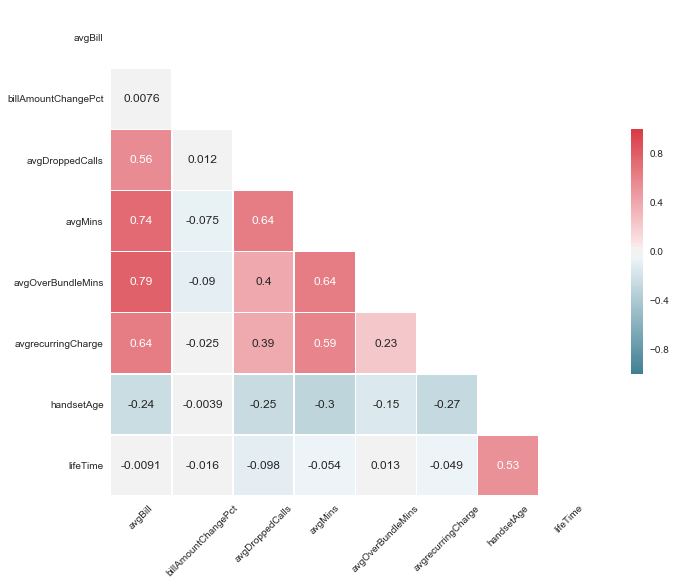

In [101]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['avgBill','billAmountChangePct','avgDroppedCalls','avgMins','avgOverBundleMins', 'avgrecurringCharge', 'handsetAge', 'lifeTime']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In the following cells are the plots for pairs of continuous features which have been shown to have a high correlation above.

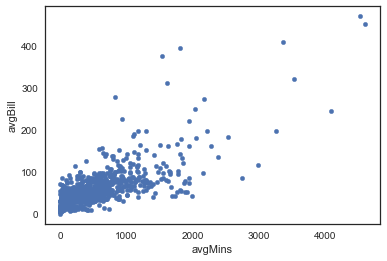

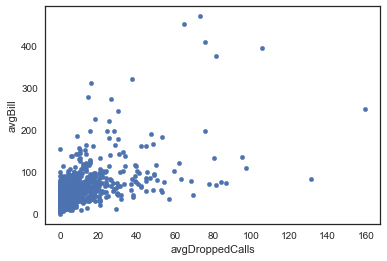

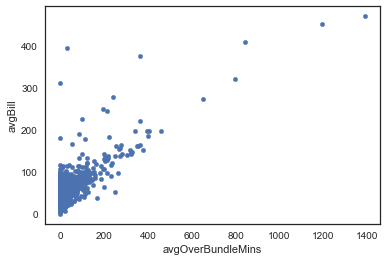

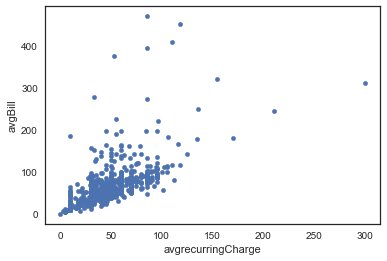

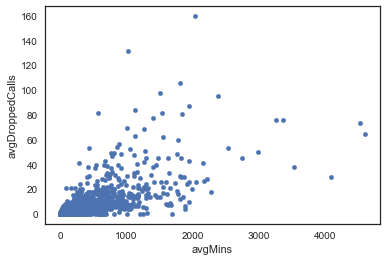

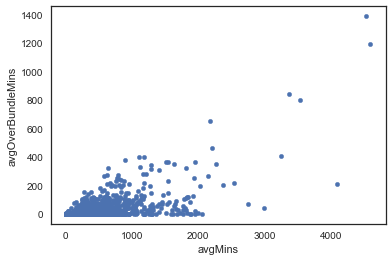

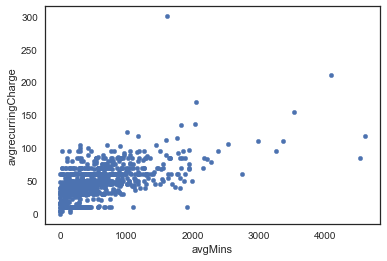

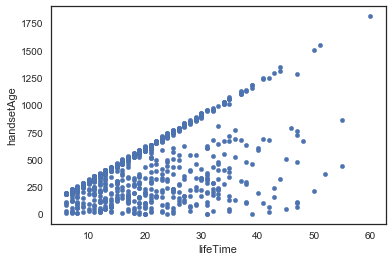

In [102]:
df.plot(kind='scatter', x='avgMins', y='avgBill')
df.plot(kind='scatter', x='avgDroppedCalls', y='avgBill')
df.plot(kind='scatter', x='avgOverBundleMins', y='avgBill')
df.plot(kind='scatter', x='avgrecurringCharge', y='avgBill')
df.plot(kind='scatter', x='avgMins', y='avgDroppedCalls')
df.plot(kind='scatter', x='avgMins', y='avgOverBundleMins')
df.plot(kind='scatter', x='avgMins', y='avgrecurringCharge')
df.plot(kind='scatter', x='lifeTime', y='handsetAge')

Plots indicate that features with high correlation are somewhat linear. Notice that handset age has a straight line cut off. This basically means that no phone is older than the life time of that customer. This is likely AT making a safe assumption about phone age, only counting the days from when the customer first registers with them.

### Categorical feature plots

(0, 100)

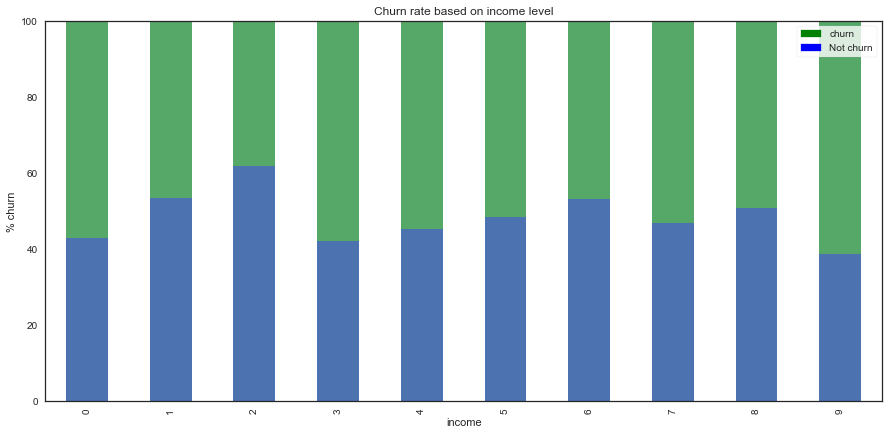

In [103]:
#Using code from the module lab
incomes = pd.unique(df.income.ravel())

df['percent'] = 0

for i in incomes:
    count = 1 / df[df.income == i].count()['churn']
    index_list = df[df['income'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','income','churn']].groupby(['income','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on income level", figsize=(15,7))

red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("income")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

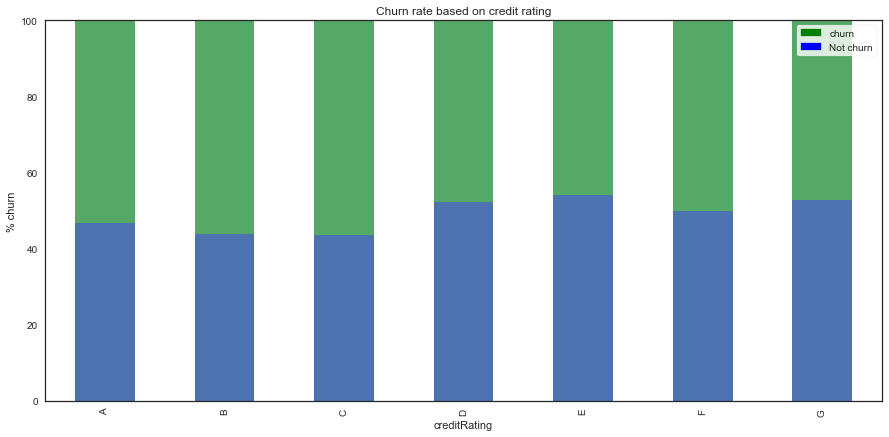

In [104]:
#Using code from the module lab
creditRatings = pd.unique(df.creditRating.ravel())

df['percent'] = 0

for i in creditRatings:
    count = 1 / df[df.creditRating == i].count()['churn']
    index_list = df[df['creditRating'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on credit rating", figsize=(15,7))

red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("creditRating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

Seems like these plots don't give any useful information.

### Continuous-categorical feature plots

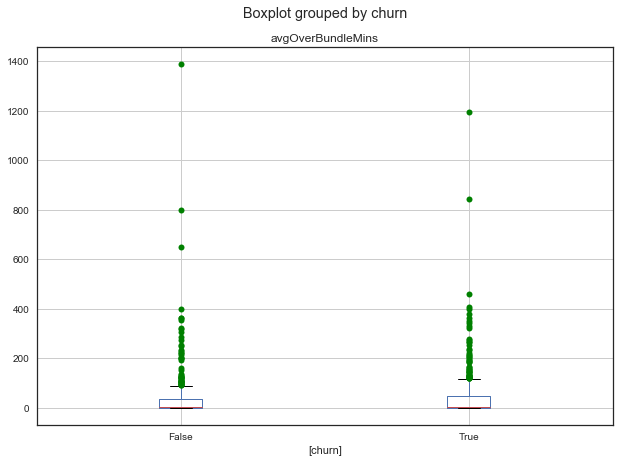

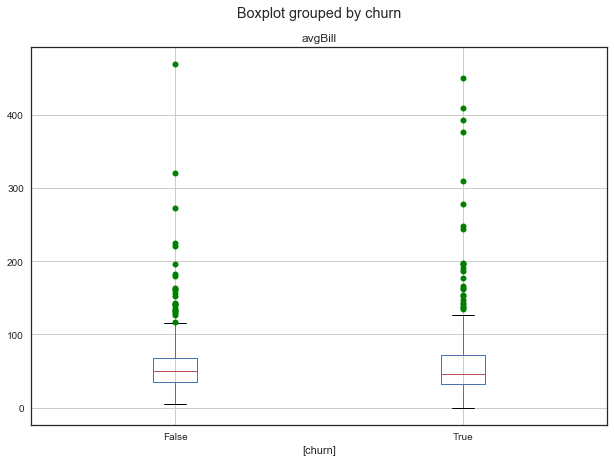

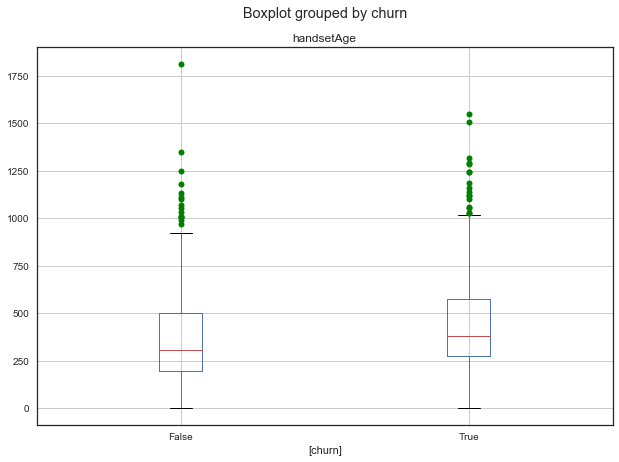

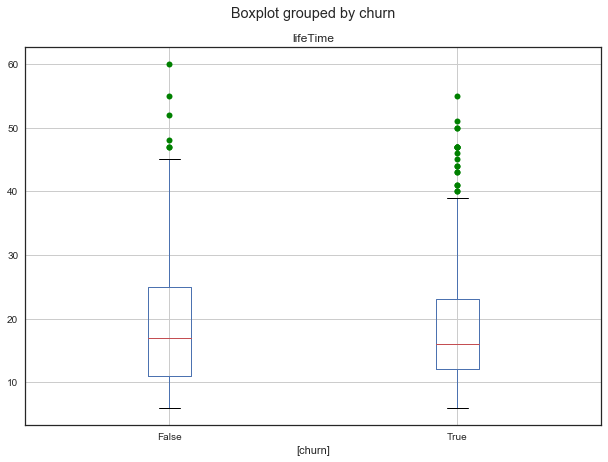

In [105]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['avgOverBundleMins'], by=['churn'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['avgBill'], by=['churn'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['handsetAge'], by=['churn'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['lifeTime'], by=['churn'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cd3b00>]], dtype=object)

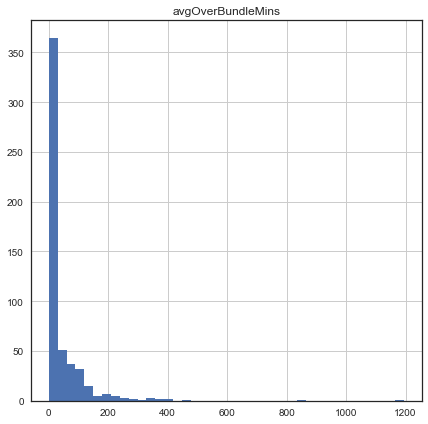

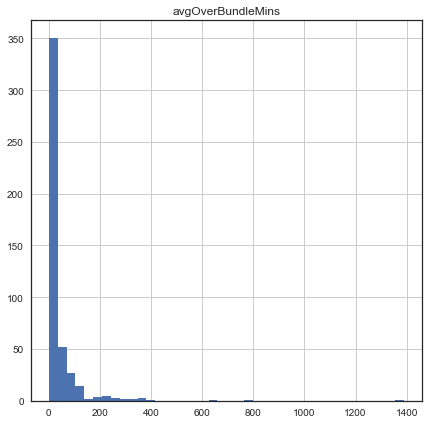

In [106]:
df[df['churn'] == True][['avgOverBundleMins']].hist(figsize=(7,7), bins=40)
df[df['churn'] == False][['avgOverBundleMins']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bab9668>]], dtype=object)

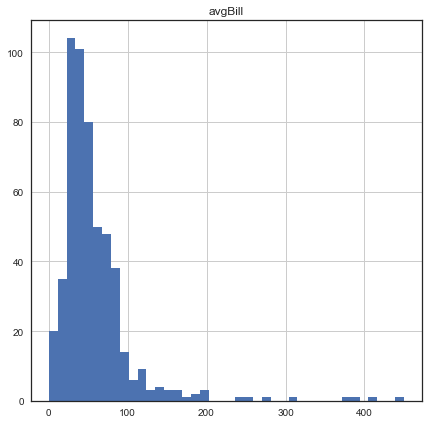

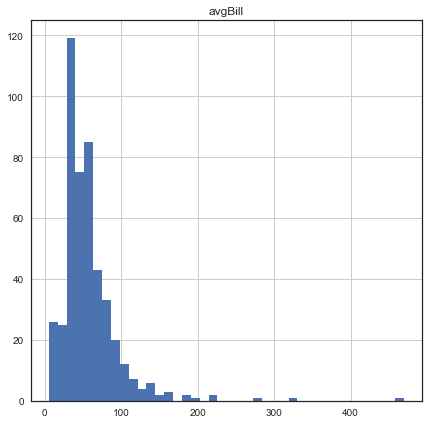

In [107]:
df[df['churn'] == True][['avgBill']].hist(figsize=(7,7), bins=40)
df[df['churn'] == False][['avgBill']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6cce48>]], dtype=object)

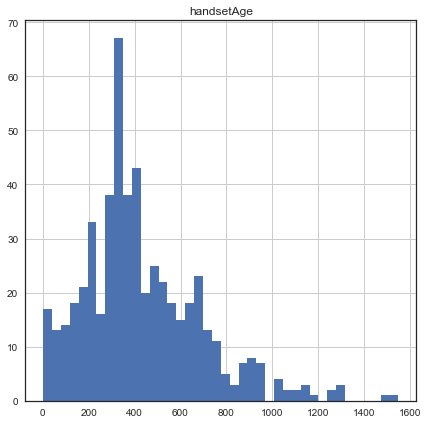

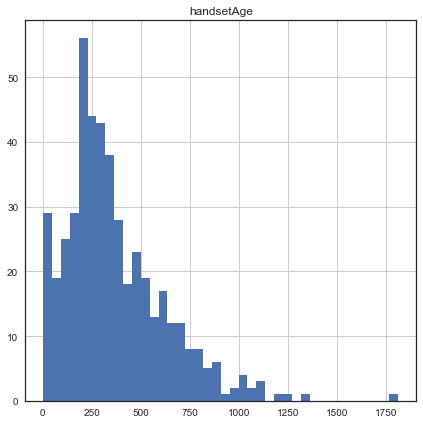

In [108]:
df[df['churn'] == True][['handsetAge']].hist(figsize=(7,7), bins=40)
df[df['churn'] == False][['handsetAge']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178d5a58>]], dtype=object)

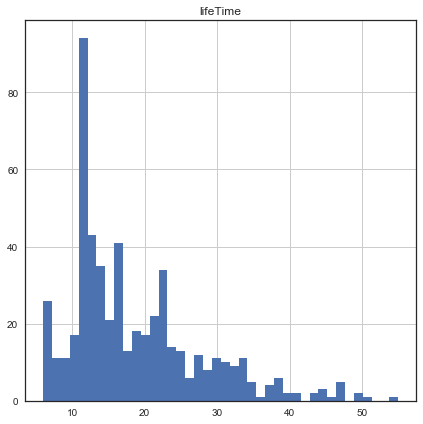

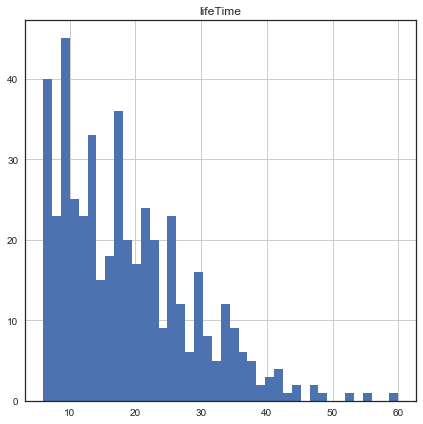

In [109]:
df[df['churn'] == True][['lifeTime']].hist(figsize=(7,7), bins=40)
df[df['churn'] == False][['lifeTime']].hist(figsize=(7,7), bins=40)

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

The data is challenging to understand in terms of churn / no churn outcome.

There seem to be a fairly strong connection of average minutes, average over bundle minutes, average recurring charge and the bill. This make sense, the more minutes, especially over bundle, the higher the bill. The subsequent plots indicated that features with high correlation are somewhat linear. Handset age had a straight line cut off as no phone is older than the customer himself/herself.

The categorical features didn't reveal much. Churn rate based on income level mainly said that the categories most likely to churn are the richest 0 and the poorest 9. Both groups are paying most attention and likely are trying to find an optimal data plan, the richest want to be richer, while the poorest are trying to survive as best as they can.

The last four plots show that the customer is slightly more likely to churn if he/she has high average over bundle minutes, high average bill, handset age is getting old and the customers' life time is short.

These features are potential candidates for a predictive model of churn.